In [11]:
%load_ext autoreload
%autoreload 2
from metric_learn import Covariance
from visiprog.data import *

from IPython.display import Image, display


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
groups_VSP, materials = read_VSP_group()

D = count_matrix(groups_VSP, 5245)
clusters_VSP = spectralClusteringDBSCAN(D, threshold=0,eps=0.0001)

In [13]:
materials = []
list_img = read_img_list()

for g in clusters_VSP:
    m = [int(os.path.basename(list_img[i])[:2]) for i in g]

    if len(np.unique(np.array(m))) != 1:
        material = -1
    else:
        material = m[0]

    materials.append(material)

clusters_VSP = [c for _, c in sorted(zip(materials, clusters_VSP))]
materials = sorted(materials)    

In [18]:
imgList = read_img_list()

for m,c in zip(materials, clusters_VSP):
    print(m)
    a = [imgList[i] for i in c]
    print(a)

0
['visiprog/data/curetaliasfree/images/08-057.png', 'visiprog/data/curetaliasfree/images/08-059.png', 'visiprog/data/curetaliasfree/images/08-061.png', 'visiprog/data/curetaliasfree/images/08-063.png', 'visiprog/data/curetaliasfree/images/08-104.png', 'visiprog/data/curetaliasfree/images/08-106.png', 'visiprog/data/curetaliasfree/images/08-109.png', 'visiprog/data/curetaliasfree/images/08-145.png', 'visiprog/data/curetaliasfree/images/08-149.png', 'visiprog/data/curetaliasfree/images/08-175.png', 'visiprog/data/curetaliasfree/images/47-181.png', 'visiprog/data/curetaliasfree/images/47-183.png']
0
['visiprog/data/curetaliasfree/images/11-002.png', 'visiprog/data/curetaliasfree/images/11-116.png', 'visiprog/data/curetaliasfree/images/11-117.png', 'visiprog/data/curetaliasfree/images/11-150.png', 'visiprog/data/curetaliasfree/images/11-152.png', 'visiprog/data/curetaliasfree/images/11-154.png', 'visiprog/data/curetaliasfree/images/11-156.png', 'visiprog/data/curetaliasfree/images/30-179.

[ 0  0  0  0  0  0  0  0  0  0  1  1  2  2  2  3  3  4  4  4  4  5  5  5  5
  5  6  6  6  6  7  7  7  7  7  8  9  9  9  9  9 10 10 10 10 11 11 12 12 12
 13 13 13 13 15 15 16 17 17 18 18 18 19 19 19 20 20 20 21 21 21 21 22 22 22
 22 24 24 24 25 25 25 26 26 26 26 27 27 28 29 29 29 30 30 31 31 31 32 33 33
 33 34 34 34 35 35 36 36 36 37 37 38 38 38 39 39 39 39 40 40 40 40 41 41 41
 42 42 43 43 43 43 44 44 44 44 45 45 46 46 46 47 47 48 48 48 49 49 49 49 49
 50 50 50 51 51 51 52 52 52 53 53 54 54 54 54 54 56 56 56 56 56 58 58 58 58
 59 59 59 60 60 60 61 61]
[ 10.   2.   3.   2.   4.   5.   4.   5.   1.   5.   4.   2.   3.   4.   0.
   2.   1.   2.   3.   3.   3.   4.   4.   0.   3.   3.   4.   2.   1.   3.
   2.   3.   1.   3.   3.   2.   3.   2.   3.   4.   4.   3.   2.   4.   4.
   2.   3.   2.   3.   5.   3.   3.   3.   2.   5.   0.   5.   0.   4.   3.
   5.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

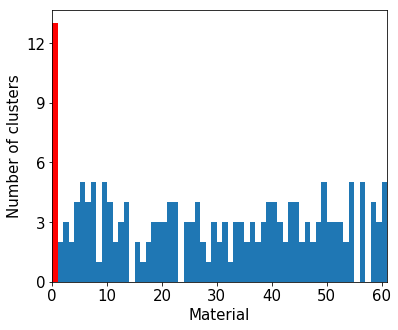

In [15]:
materials = np.array(materials)
materials[materials==-1]=0

print(materials)

matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(6, 5))
counts, unique, plot = plt.hist(materials, bins=range(0,62))

print(counts)
print(unique)

plt.bar(0.5, 13, 1, align='center', color='r')

ax.set_xlim(0,61)
plt.yticks(range(0,13,3))

plt.xlabel('Material')
plt.ylabel('Number of clusters')

plt.savefig('histogram_clusters.pdf')

In [6]:
print(counts)

[ 11.   2.   3.   2.   4.   5.   4.   5.   1.   5.   4.   2.   3.   4.   0.
   2.   1.   2.   3.   3.   3.   4.   4.   0.   3.   2.   4.   2.   1.   3.
   2.   3.   1.   3.   3.   2.   2.   2.   3.   4.   4.   3.   2.   4.   4.
   2.   3.   2.   3.   5.   3.   3.   3.   2.   5.   0.   5.   0.   4.   3.
   5.]
